In [1]:
import pandas as pd
import pymysql

In [2]:
conn = pymysql.connect(
        host='localhost',
        user='root',
        password='root',
        database='job_analysis',
        charset="utf8mb4"
)

In [3]:
sql = """
SELECT 
    job_name,
    company,
    city,
    salary,
    experience,
    education,
    skills,
    keyword,
    crawl_time
FROM jobs
"""

In [4]:
df = pd.read_sql(sql, conn)
conn.close()

In [5]:
df.head()

,job_name,company,city,salary,experience,education,skills,keyword,crawl_time
0,Python 后端开发工程师,深圳市迈远科技,深圳·龙华区,1-1.8万·13薪,3年及以上,本科,"3年及以上,本科,mysql,数据库,linux,css,html,需求分析,前端,js,研...",Python,2026-01-12 14:34:25
1,经理-系统与软件,科朗设备（苏州）,苏州,40-60万/年,10年及以上,本科,"10年及以上,本科,电气工程,c++,系统工程,robotics,can协议,物料搬运,py...",Python,2026-01-12 14:34:25
2,大模型微调工程师,云南云创数据技术,昆明·五华区,8千-1.2万,1-3年,本科,"1-3年,本科,五险一金,年终奖金,定期体检,周末双休,节日福利,培训,免费工作餐",Python,2026-01-12 14:34:25
3,软件工程师,长春化工（江苏）,常熟,7.8-8.9千·14薪,1年及以上,本科,"1年及以上,本科,java,c#,rabbitmq,mongodb,sql数据库,pytho...",Python,2026-01-12 14:34:25
4,智算云平台研发工程师,四川九洲投资控股集团,成都·锦江区,20-30万/年,5年及以上,本科,"5年及以上,本科",Python,2026-01-12 14:34:25


In [6]:
df.shape

(5120, 9)

In [8]:
# 数据概览
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5120 entries, 0 to 5119
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   job_name    5120 non-null   object        
 1   company     5120 non-null   object        
 2   city        5120 non-null   object        
 3   salary      5120 non-null   object        
 4   experience  5120 non-null   object        
 5   education   5120 non-null   object        
 6   skills      5120 non-null   object        
 7   keyword     5120 non-null   object        
 8   crawl_time  5120 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(8)
memory usage: 360.1+ KB


f:\python3.7\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  This is separate from the ipykernel package so we can avoid doing imports until


,job_name,company,city,salary,experience,education,skills,keyword,crawl_time
count,5120,5120,5120,5120,5120,5120,5120,5120,5120
unique,2105,2419,528,611,48,8,3426,6,272
top,前端开发工程师,青岛联辰诺嘉企业管理,上海·浦东新区,1-1.5万,无需经验,本科,"3年及以上,本科",Python,2026-01-12 14:34:25
freq,261,159,207,238,1401,2869,25,1000,20
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2026-01-12 14:34:25
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2026-01-12 22:27:39


In [10]:
city_count = df["city"].value_counts().head() # 所有职位
city_count

上海·浦东新区    207
深圳·南山区     141
上海         115
深圳·宝安区     105
广州·黄埔区      99
Name: city, dtype: int64

In [11]:
python_select = df[df['keyword']=='Python']
city_counts = python_select['city'].value_counts().head(10) # Python相关
city_counts

上海·浦东新区    60
深圳·南山区     37
上海         36
上海·闵行区     30
深圳·福田区     21
深圳·宝安区     21
广州·黄埔区     20
南京         19
上海·长宁区     18
北京·海淀区     18
Name: city, dtype: int64

#### 由上可以看出Python相关岗位在一线城市还是比较集中，在前十排名中北上广深占9个，南京（新一线？）占一个

In [12]:
keyword_count = df['keyword'].value_counts().head(10)
keyword_count

Python    1000
数据        1000
Java      1000
前端        1000
文员        1000
数据专员       120
Name: keyword, dtype: int64

In [17]:
(df['education'] == '').sum()

309

In [18]:
edu_count = df[df['education'] != '']['education'].value_counts()
edu_count

本科       2869
大专       1432
中技/中专     182
硕士        163
高中        150
初中及以下      12
博士          3
Name: education, dtype: int64

In [20]:
pd.crosstab(df["keyword"], df[df['education'] != '']["education"])

education,中技/中专,初中及以下,博士,大专,本科,硕士,高中
keyword,,,,,,,
Java,0,0,0,241,738,18,0
Python,0,0,3,192,709,85,0
前端,0,0,0,186,764,25,7
数据,6,3,0,258,526,34,23
数据专员,1,0,0,62,50,0,2
文员,175,9,0,493,82,1,118


#### 本科要求占比56%

In [21]:
df["salary"].dropna().unique()[:20]

array(['1-1.8万·13薪', '40-60万/年', '8千-1.2万', '7.8-8.9千·14薪', '20-30万/年',
       '1-2万', '1-1.5万·13薪', '9千-1.4万', '4.5-8千', '6-9千', '1.2-2.4万·14薪',
       '1.5-3万·13薪', '1.2-1.5万·13薪', '1.6-3.2万·13薪', '1-1.5万', '6-8千·13薪',
       '5千-1万', '6千-1.2万', '6千-1万', '7-9千'], dtype=object)

In [22]:
df["salary"].dropna().sample(20)

4854            4-6千
2371            2-3万
3272            7-8千
470             6-8千
5091          4.5-6千
5099          4-4.5千
1096           6千-1万
1417        26-34万/年
2975        15-30万/年
4023            5-8千
2957        1.8-2.2万
4564            4-6千
3640          1-1.5万
680          8千-1.1万
488           1.5-3万
4307            4-5千
4555        7-8千·13薪
2329        1.2-1.8万
1253            5-8千
3388    1.5-2.5万·14薪
Name: salary, dtype: object

In [38]:
import re
import numpy as np

def parse_salary(s):
    if pd.isna(s):
        return np.nan, np.nan, np.nan

    s = s.replace(" ", "")
    
    # 面议 / 暂无
    if "面议" in s:
        return np.nan, np.nan, np.nan

    # 提取薪数（如 13薪）
    salary_months = 12
    m = re.search(r"(\d+)薪", s)
    if m:
        salary_months = int(m.group(1))

    # 年薪：40-60万/年
    if "万/年" in s:
        nums = re.findall(r"\d+\.?\d*", s)
        if len(nums) >= 2:
            low = float(nums[0]) * 10 / 12
            high = float(nums[1]) * 10 / 12
            return low, high, (low + high) / 2

    # 千单位：4.5-8千
    if "千" in s:
        nums = re.findall(r"\d+\.?\d*", s)
        if len(nums) >= 2:
            low = float(nums[0])
            high = float(nums[1])
            return low, high, (low + high) / 2

    # 万单位：1-1.8万 / 1-2万
    if "万" in s:
        nums = re.findall(r"\d+\.?\d*", s)
        if len(nums) >= 2:
            low = float(nums[0]) * 10
            high = float(nums[1]) * 10
            avg = (low + high) / 2
            avg = avg * salary_months / 12  # 考虑 13 薪
            return low, high, avg

    # K 单位：10-15K
    if "K" in s or "k" in s:
        nums = re.findall(r"\d+\.?\d*", s)
        if len(nums) >= 2:
            low = float(nums[0])
            high = float(nums[1])
            return low, high, (low + high) / 2

    return np.nan, np.nan, np.nan


In [39]:
test_samples = [
    "1-1.8万·13薪",
    "40-60万/年",
    "8千-1.2万",
    "1-2万",
    "4.5-8千",
    "10-15K"
]

for s in test_samples:
    print(s, "→", parse_salary(s))

1-1.8万·13薪 → (10.0, 18.0, 15.166666666666666)
40-60万/年 → (33.333333333333336, 50.0, 41.66666666666667)
8千-1.2万 → (8.0, 1.2, 4.6)
1-2万 → (10.0, 20.0, 15.0)
4.5-8千 → (4.5, 8.0, 6.25)
10-15K → (10.0, 15.0, 12.5)


In [40]:
df[["salary_low", "salary_high", "salary_avg"]] = (
    df["salary"]
    .apply(lambda x: pd.Series(parse_salary(x)))
)

In [41]:
df[["salary", "salary_avg"]].head(10)

,salary,salary_avg
0,1-1.8万·13薪,15.166667
1,40-60万/年,41.666667
2,8千-1.2万,4.600000
3,7.8-8.9千·14薪,8.350000
4,20-30万/年,20.833333
5,1-2万,15.000000
6,1-1.5万·13薪,13.541667
7,8千-1.2万,4.600000
8,9千-1.4万,5.200000
9,4.5-8千,6.250000


In [42]:
df[["salary_low", "salary_high", "salary_avg"]]

,salary_low,salary_high,salary_avg
0,10.000000,18.0,15.166667
1,33.333333,50.0,41.666667
2,8.000000,1.2,4.600000
3,7.800000,8.9,8.350000
4,16.666667,25.0,20.833333
...,...,...,...
5115,5.000000,6.0,5.500000
5116,5.000000,7.0,6.000000
5117,5.000000,6.0,5.500000
5118,4.000000,5.0,4.500000


In [43]:
city_salary = (
    df.dropna(subset=["salary_avg"])
      .groupby("city")["salary_avg"]
      .mean()
      .sort_values(ascending=False)
      .head(10)
)

city_salary

city
大连·甘井子区      27.700000
福州·台江区       25.613095
福州·仓山区       25.000000
浙江省          24.375000
福州·闽侯县       23.291667
吉安·吉安县       22.500000
苏州·苏州工业园区    20.593085
绍兴·越城区       20.527778
嘉兴·嘉善县       20.416667
东莞·石碣镇       20.041667
Name: salary_avg, dtype: float64

In [44]:
city_keyword_salary = (
    df.dropna(subset=["salary_avg"])
      .groupby(["keyword", "city"])["salary_avg"]
      .mean()
      .reset_index()
)

city_keyword_salary.head()

,keyword,city,salary_avg
0,Java,,30.000000
1,Java,上海,13.494298
2,Java,上海·嘉定区,10.961111
3,Java,上海·奉贤区,16.250000
4,Java,上海·宝山区,20.000000


In [46]:
city_list = [
    "北京", "上海", "深圳", "广州",
    "杭州", "南京", "苏州",
    "成都", "重庆",
    "武汉", "西安",
    "天津", "郑州",
    "长沙", "合肥",
    "大连", "青岛", "厦门"
]
def extract_city(city_str):
    if pd.isna(city_str):
        return "未知"

    for city in city_list:
        if city in city_str:
            return city

    # 省级但未识别到城市
    if "省" in city_str:
        return "省内其他"

    return "其他"

In [48]:
df["city_clean"] = df["city"].apply(extract_city)
df["city_clean"]

0       深圳
1       苏州
2       其他
3       其他
4       成都
        ..
5115    苏州
5116    其他
5117    广州
5118    北京
5119    武汉
Name: city_clean, Length: 5120, dtype: object

In [49]:
first_tier = ["北京", "上海", "深圳", "广州"]
new_first_tier = ["杭州", "南京", "苏州", "成都", "重庆", "武汉", "西安"]
def city_level(city):
    if city in first_tier:
        return "一线城市"
    elif city in new_first_tier:
        return "新一线城市"
    else:
        return "其他城市"

In [50]:
df["city_level"] = df["city_clean"].apply(city_level)

In [51]:
df.groupby("city_level")["salary_avg"].mean().sort_values(ascending=False)

city_level
一线城市     13.237110
新一线城市    11.414501
其他城市      8.402606
Name: salary_avg, dtype: float64

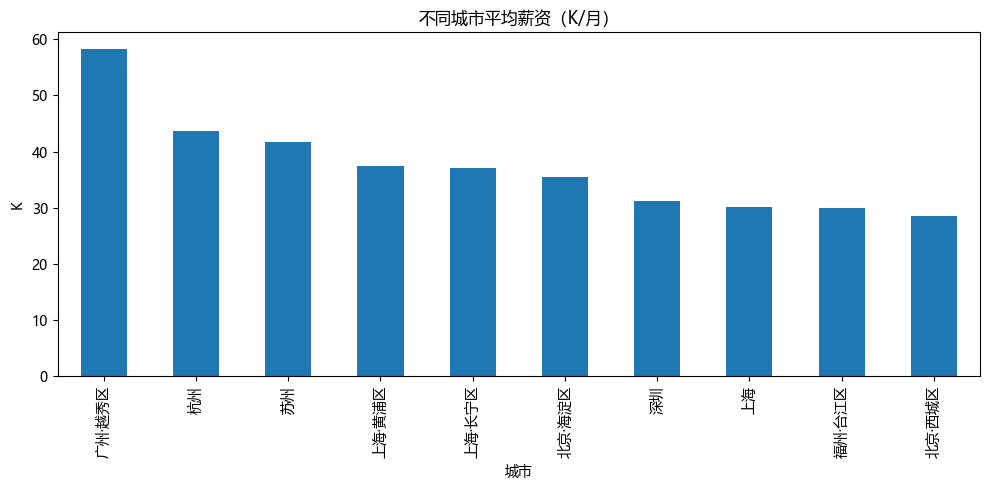

In [37]:
import matplotlib.pyplot as plt

# 设置中文字体（Windows系统）
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

# 或者使用微软雅黑
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
city_salary.plot(kind="bar", figsize=(10,5))
plt.title("不同城市平均薪资（K/月）")
plt.ylabel("K")
plt.xlabel("城市")
plt.tight_layout()
plt.show()

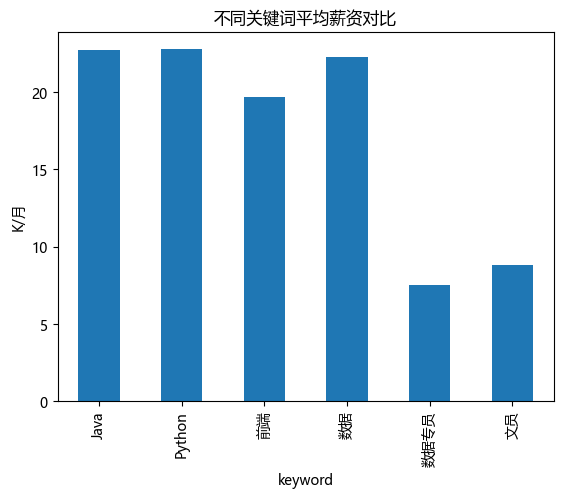

In [36]:
# 设置中文字体（Windows系统）
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

# 或者使用微软雅黑
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
df.groupby("keyword")["salary_avg"].mean().plot(
    kind="bar", title="不同关键词平均薪资对比"
)
plt.ylabel("K/月")
plt.show()

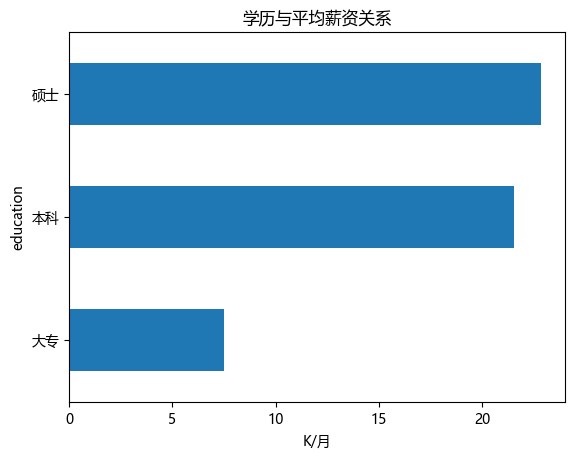

In [35]:
# 设置中文字体（Windows系统）
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

# 或者使用微软雅黑
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
edu_salary = (
    df.dropna(subset=["salary_avg"])
      .groupby("education")["salary_avg"]
      .mean()
      .sort_values()
)

edu_salary.plot(kind="barh", title="学历与平均薪资关系")
plt.xlabel("K/月")
plt.show()